In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, mean_squared_error, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,  roc_curve, roc_auc_score, precision_recall_curve, auc

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from scipy.spatial import distance
from warnings import filterwarnings
from sklearn.utils.class_weight import compute_class_weight
filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from hyperopt import hp, tpe, Trials, fmin,space_eval
import graphviz
from IPython.display import display


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, tpe, fmin

import statsmodels.formula.api as smf
from sklearn.metrics import make_scorer

In [2]:
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('SPX_df.csv', index_col='date')
df.head()

,USTVOL,BEI,JPYRR,GDPNOW,FINCON,OIL,ECOSURP,USTR,SPXPOS,USTPOS,DXYPOS,AAII,R4WSPX,R2WSPX,SPX_4,SPX_8,SPX_16,SPX_32,SPX_64
date,,,,,,,,,,,,,,,,,,,
2011-09-14,-1.572940,-0.055558,-0.651098,1.798196,0.245111,-1.097728,1.856571,0.488889,0.311000,0.834344,0.444165,-1.585113,0,1,1.00000,0.776076,0.532787,0.400532,0.296116
2011-09-21,-0.387444,-0.461233,0.164507,0.004356,0.056102,-1.093142,-0.389744,-1.021998,-1.598593,1.165909,0.233943,0.110896,0,1,0.00000,0.083550,0.193783,0.475712,0.202344
2011-09-28,2.531801,0.568746,0.257632,-0.062650,-0.018103,-0.158808,-0.203011,1.969365,0.435989,-0.680475,-0.234681,-0.592135,0,0,0.37561,0.288474,0.248699,0.288695,0.135181
2011-10-05,0.334144,-0.331461,0.166958,0.266176,-0.147084,0.233917,1.239351,-0.640622,-0.169199,-0.374285,-0.139999,0.852070,0,0,1.00000,0.588313,0.383627,0.374394,0.176385
2011-10-12,-0.414408,1.524823,1.084317,-0.375892,-0.280339,1.392025,-0.053101,1.563207,-0.081087,0.277890,0.087266,0.398273,0,0,1.00000,1.000000,1.000000,0.902724,0.439481


In [4]:
# df = pd.read_csv('prueba.csv', index_col='date')
# df.head()

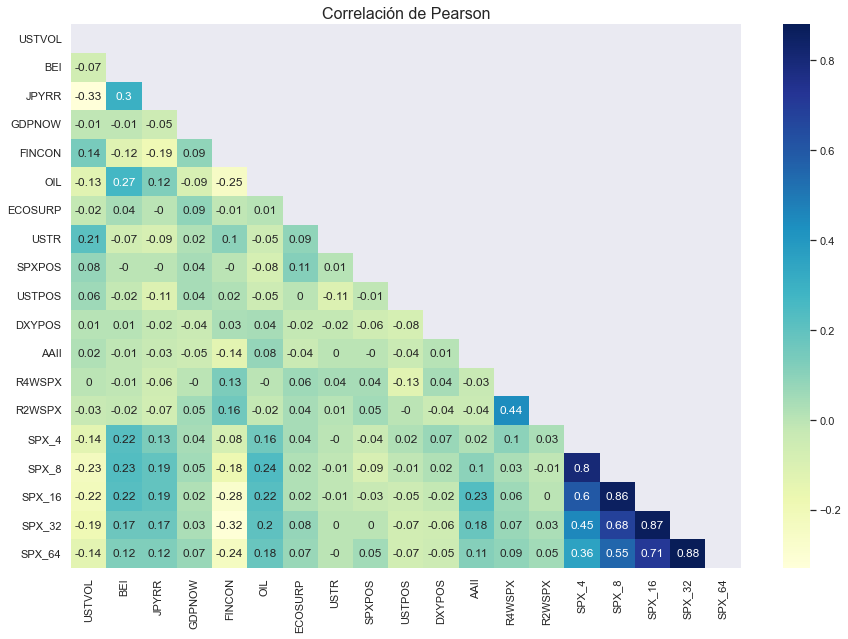

In [5]:
#Correlación de Pearson
plt.figure(figsize = (15,10))
sns.set(font_scale=1)
corr_df = df.corr(method='pearson').round(2)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='YlGnBu',annot_kws={"size":12}, square = False, mask = mask, alpha = 1)
plt.title('Correlación de Pearson', fontsize=16)
plt.show()

0    0.665584
1    0.334416
Name: R4WSPX, dtype: float64


<AxesSubplot:xlabel='R4WSPX', ylabel='count'>

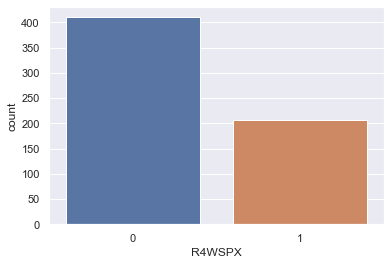

In [6]:
print(df.R4WSPX.value_counts() / df.R4WSPX.value_counts().sum())
sns.countplot( x = 'R4WSPX', data = df)

In [7]:
# Dividir los datos en entrenamiento y testeo
X = df.drop(['R4WSPX', 'R2WSPX'], axis = 1)
y = df.R4WSPX

names = X.columns

Ntest = 100

X_train = X.iloc[:-Ntest]
X_test = X.iloc[-Ntest:]

y_train = y.iloc[:-Ntest]
y_test = y.iloc[-Ntest:]

print(X_train.shape)
print(X_test.shape)


(516, 17)
(100, 17)


In [8]:
smote = SMOTE(random_state=42)
X_train, y_train  = smote.fit_resample(X_train, y_train)

# Regresión Logística

Testing accuracy train = 0.6782729805013927
Testing accuracy  test= 0.55
[0.625      0.65972222 0.64583333 0.74125874 0.65734266]
Mediana 0.6573
Media 0.6658
Min 0.625
Max 0.7413
-------------------------------------------------------------------------------------------------------------


Best estimador: {'solver': 'saga', 'penalty': 'l1', 'C': 1.3483483483483483}
Testing accuracy train = 0.6796657381615598
Testing accuracy  test= 0.56


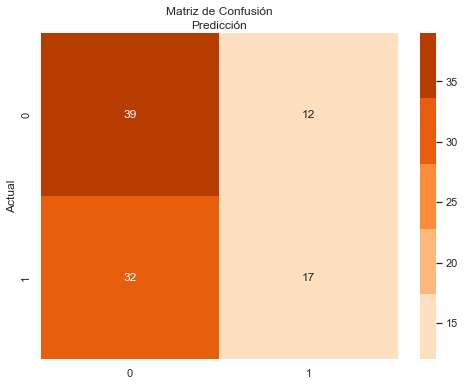

-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.55      0.76      0.64        51
           1       0.59      0.35      0.44        49

    accuracy                           0.56       100
   macro avg       0.57      0.56      0.54       100
weighted avg       0.57      0.56      0.54       100



In [9]:

random_grid = {'penalty': ["l1","l2", "elasticnet", "none"],
           'C': np.linspace(0,3,1000),
           "solver": ["liblinear", "sag", "saga"]}
cv = StratifiedKFold(n_splits=5,shuffle = False)
Logist = LogisticRegression(class_weight='balanced')
Logist.fit(X_train, y_train)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
scores = cross_val_score(Logist, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)
print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')
print("-------------------------------------------------------------------------------------------------------------")

Logist = RandomizedSearchCV(estimator = LogisticRegression(class_weight='balanced'), param_distributions = random_grid,random_state=42, cv=cv)
Logist.fit(X_train, y_train)
print('Best estimador:', Logist.best_params_)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Oranges", n_colors=5)
sns.heatmap(cnf_matrix, annot=True, cmap=colors, fmt='g')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicción')
ax.set_ylabel('Actual')
ax.set_title('Matriz de Confusión')
plt.show()
print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [10]:
# Obtener los coeficientes y la importancia de las variables
coefficients = np.abs(Logist.best_estimator_.coef_[0])
importance = coefficients / np.sum(coefficients)

impvariables = pd.DataFrame()

impvariables['Variable'] = names

impvariables['Importancia'] = importance
impvariables.sort_values('Importancia', ascending = False)

,Variable,Importancia
4,FINCON,0.296404
16,SPX_64,0.155335
13,SPX_8,0.142160
14,SPX_16,0.113410
12,SPX_4,0.104435
9,USTPOS,0.048708
6,ECOSURP,0.031044
2,JPYRR,0.030069
7,USTR,0.019788
8,SPXPOS,0.013693


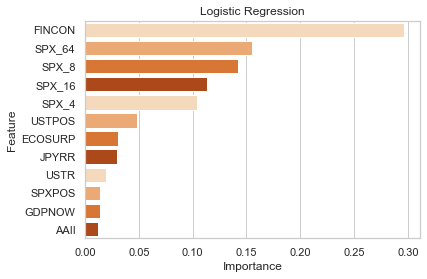

In [11]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = impvariables[impvariables.Importancia > 0.01]
impvariables.sort_values('Importancia', ascending = False, inplace = True)

colors = sns.color_palette("Oranges", n_colors=4)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Logistic Regression');

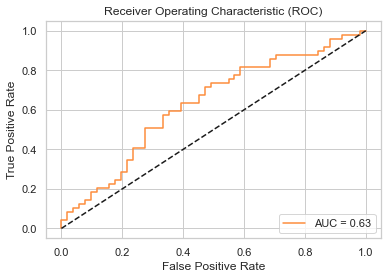

In [12]:
# Obtener las probabilidades predichas en el conjunto de prueba
y_pred_proba = Logist.predict_proba(X_test)[:, 1]

# Calcular el valor de AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Crear el gráfico de la curva ROC con colores personalizados
colors = sns.color_palette("Oranges", n_colors=1)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color=colors[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [13]:
# Definir la función objetivo para la optimización bayesiana
def objective(params):
    model = RandomForestClassifier(**params, class_weight= 'balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok', 'params': params}

In [14]:
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 100)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 10)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(2,10))
}

In [15]:
trials = Trials()  
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=1000, trials=trials)


100%|██████████| 1000/1000 [02:49<00:00,  5.89trial/s, best loss: -0.61]


In [16]:
losses = [trial['result']['loss'] for trial in trials.trials]

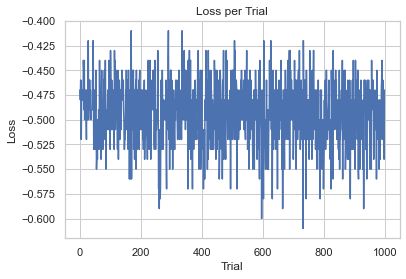

In [17]:
plt.plot(range(len(losses)), losses)
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.title('Loss per Trial')
plt.show()

In [18]:
best_params = space_eval(space, best)
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 1, 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 13}


In [19]:
# Crear un modelo Random Forest con los hiperparámetros optimizados
modelo = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               min_samples_split=best_params['min_samples_split'],
                               min_samples_leaf=best_params['min_samples_leaf'],
                               class_weight = 'balanced')

In [20]:
# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)

In [21]:
# Obtener la precisión promedio en la validación cruzada
mean_accuracy = np.mean(cv_scores)
mean_accuracy

0.6058857808857809

In [22]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=8,
                       n_estimators=13)

In [23]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

#Calcular Accuracy
print('Accuracy:', np.mean(y_pred == y_test))

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precisión: {:.4f}".format(precision))

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.4f}".format(recall))

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.4f}".format(f1))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.4f}".format(mse))

# Calcular el área bajo la curva ROC (ROC-AUC)
y_pred_prob = modelo.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Área bajo la curva ROC (ROC-AUC): {:.4f}".format(roc_auc))

Accuracy: 0.57
Precisión: 0.6000
Recall: 0.3673
F1-score: 0.4557
Error cuadrático medio (MSE): 0.4300
Área bajo la curva ROC (ROC-AUC): 0.5848


In [24]:
print(classification_report(y_test, y_pred > 0.5))

              precision    recall  f1-score   support

           0       0.56      0.76      0.64        51
           1       0.60      0.37      0.46        49

    accuracy                           0.57       100
   macro avg       0.58      0.57      0.55       100
weighted avg       0.58      0.57      0.55       100



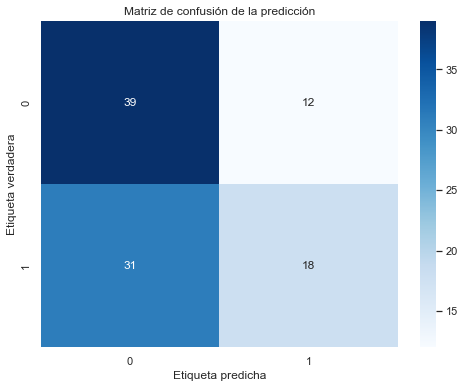

In [25]:
# Crear la matriz de confusión con datos de prueba
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title('Matriz de confusión de la predicción')
plt.show()

## Importancia de las Variables

In [26]:
# Obtener la importancia de las variables
importances = modelo.feature_importances_

# Obtener los nombres de las variables
feature_names = X.columns

# Crear un DataFrame con las importancias y los nombres de las variables
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})

# Ordenar las variables por importancia descendente
importance_df = importance_df.sort_values('Importancia', ascending=False)

print(importance_df)


   Variable  Importancia
15   SPX_32     0.230769
16   SPX_64     0.153846
7      USTR     0.153846
12    SPX_4     0.153846
14   SPX_16     0.076923
10   DXYPOS     0.076923
8    SPXPOS     0.076923
4    FINCON     0.076923
6   ECOSURP     0.000000
1       BEI     0.000000
9    USTPOS     0.000000
5       OIL     0.000000
11     AAII     0.000000
13    SPX_8     0.000000
3    GDPNOW     0.000000
2     JPYRR     0.000000
0    USTVOL     0.000000


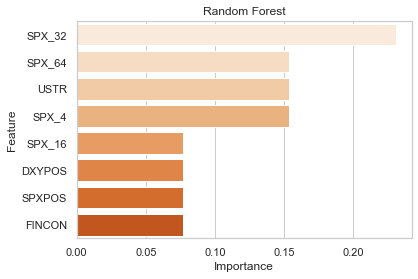

In [27]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = importance_df[importance_df.Importancia > 0]

colors = sns.color_palette("Oranges", n_colors=10)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Random Forest');

## Sesgo y Varianza

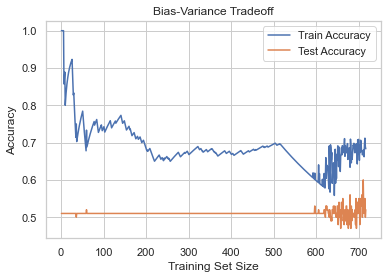

In [28]:
# Inicializar las listas para almacenar las precisiones
train_accuracies = []
test_accuracies = []


# Definir el rango de tamaños de conjunto de entrenamiento
train_sizes = np.arange(1, len(X_train))

# Calcular la precisión para diferentes tamaños de conjunto de entrenamiento
for train_size in train_sizes:
    # Ajustar el modelo Random Forest con los mejores hiperparámetros encontrados
    model = RandomForestClassifier(**best_params)
    model.fit(X_train[:train_size], y_train[:train_size])
    
    # Calcular la precisión del conjunto de entrenamiento y prueba
    train_pred = model.predict(X_train[:train_size])
    train_accuracy = accuracy_score(y_train[:train_size], train_pred)
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Almacenar las precisiones del conjunto de entrenamiento y prueba
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Graficar las precisiones en función del tamaño del conjunto de entrenamiento
plt.plot(train_sizes, train_accuracies, label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

# XG Boost

In [29]:
def metricas(y_test,y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cnf = confusion_matrix(y_test, y_pred)
    fig,ax=plt.subplots(figsize=(8,6))
    sns.heatmap(cnf,annot=True,cmap='Blues_r',fmt='g',)
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_title('Matriz de confusión')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print(classification_report(y_test, y_pred > 0.5))
    print("Confusion Matrix:")

def AUC(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Grafica la curva ROC
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [30]:
# Default parameters
Dparams = {
    'booster': 'gbtree', 
    'verbosity': 1, # Verbosity of printing messages. 1 is warning messages.
    'objective': 'binary:logistic', # Classification task
    'subsample': 1, # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. 
    'colsample_bytree': 1, # Is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    'eta': 0.3, # Step size shrinkage used in update to prevents overfitting. Shrinks the feature weights to make the boosting process more conservative.
    'max_depth': 6, # Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth.
    'eval_metric': ['logloss','error','auc'],
    'seed': 42} # for reproducible results

In [31]:
# Utilizando la librería XGBoost y los paramétros por default
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(Dparams, dtrain, 300, evals = watchlist,
                      early_stopping_rounds = 50, 
                      verbose_eval = 10
                      )

[0]	train-logloss:0.57234	train-error:0.16574	train-auc:0.89490	test-logloss:0.72750	test-error:0.54000	test-auc:0.47179
[10]	train-logloss:0.19067	train-error:0.01253	train-auc:0.99951	test-logloss:1.02167	test-error:0.54000	test-auc:0.51140
[20]	train-logloss:0.09781	train-error:0.00000	train-auc:1.00000	test-logloss:1.13805	test-error:0.55000	test-auc:0.50620
[30]	train-logloss:0.05678	train-error:0.00000	train-auc:1.00000	test-logloss:1.21754	test-error:0.52000	test-auc:0.51261
[40]	train-logloss:0.03981	train-error:0.00000	train-auc:1.00000	test-logloss:1.30028	test-error:0.50000	test-auc:0.52141
[50]	train-logloss:0.02992	train-error:0.00000	train-auc:1.00000	test-logloss:1.37510	test-error:0.50000	test-auc:0.51861
[60]	train-logloss:0.02428	train-error:0.00000	train-auc:1.00000	test-logloss:1.44149	test-error:0.50000	test-auc:0.51461
[70]	train-logloss:0.02034	train-error:0.00000	train-auc:1.00000	test-logloss:1.49402	test-error:0.51000	test-auc:0.51421
[80]	train-logloss:0.0176

In [32]:
y_pred1 = xgb_model.predict(dtest)
y_pred_rounded = np.round(y_pred1)

Precision: 0.4827586206896552
Recall: 0.2857142857142857
F1-score: 0.358974358974359
              precision    recall  f1-score   support

           0       0.51      0.71      0.59        51
           1       0.48      0.29      0.36        49

    accuracy                           0.50       100
   macro avg       0.49      0.50      0.47       100
weighted avg       0.50      0.50      0.48       100

Confusion Matrix:


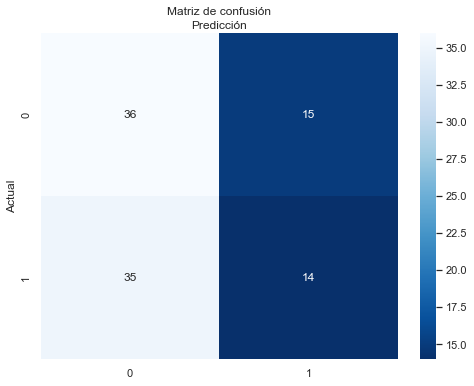

In [33]:
metricas(y_test, y_pred_rounded)

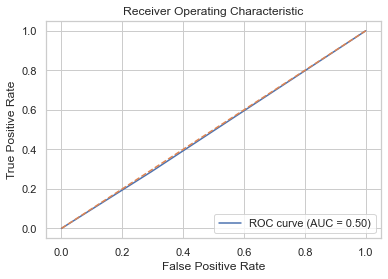

In [34]:
AUC(y_test, y_pred_rounded)

## Optimización de Hiperparámetros

In [35]:
# Definir espacio de búsqueda de hiperparámetros
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'eta': hp.uniform('eta',0.1, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [36]:
ratio = float(y_train.value_counts()[0]) / y_train.value_counts()[1]

In [37]:
# Función objetivo para optimización
def objective(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        eta=params['eta'],
        n_estimators=int(params['n_estimators']),
        random_state=42,
        scale_pos_weight=ratio        
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok'}

In [38]:

# Realizar la optimización de parámetros
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=1000,
    )

  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 1000/1000 [05:21<00:00,  3.11trial/s, best loss: -0.63]


In [39]:
best_params

{'colsample_bytree': 0.6127514568566094,
 'eta': 0.9021131710673386,
 'max_depth': 4.0,
 'n_estimators': 611.0,
 'subsample': 0.8091528071014379}

In [40]:
# Entrenar el modelo con los mejores parámetros encontrados
final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eta=best_params['eta'],
    eval_metric=['logloss','error','auc'],
    random_state=42
)
final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.55003	validation_0-error:0.25766	validation_0-auc:0.76066	validation_1-logloss:0.78573	validation_1-error:0.44000	validation_1-auc:0.57683
[1]	validation_0-logloss:0.49154	validation_0-error:0.21588	validation_0-auc:0.84339	validation_1-logloss:0.80408	validation_1-error:0.42000	validation_1-auc:0.57483
[2]	validation_0-logloss:0.40381	validation_0-error:0.17270	validation_0-auc:0.90791	validation_1-logloss:0.87045	validation_1-error:0.42000	validation_1-auc:0.59144
[3]	validation_0-logloss:0.36852	validation_0-error:0.14206	validation_0-auc:0.92654	validation_1-logloss:0.88442	validation_1-error:0.39000	validation_1-auc:0.58964
[4]	validation_0-logloss:0.33434	validation_0-error:0.12674	validation_0-auc:0.94356	validation_1-logloss:0.89252	validation_1-error:0.40000	validation_1-auc:0.59504
[5]	validation_0-logloss:0.28605	validation_0-error:0.09749	validation_0-auc:0.96543	validation_1-logloss:1.07326	validation_1-error:0.41000	validation_1-auc:0.56563
[6]	

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6127514568566094, early_stopping_rounds=None,
              enable_categorical=False, eta=0.9021131710673386,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=611, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

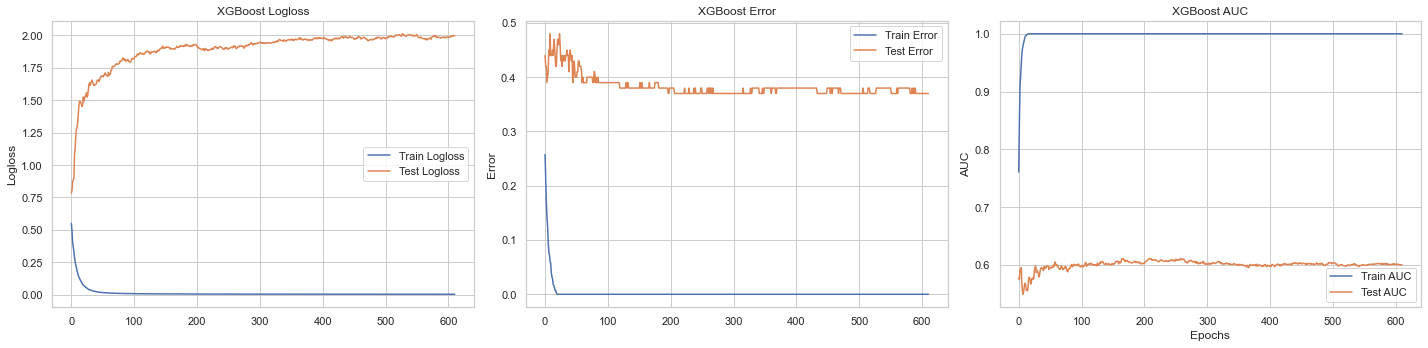

In [41]:
results = final_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.7
Recall: 0.42857142857142855
F1-score: 0.5316455696202531
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        51
           1       0.70      0.43      0.53        49

    accuracy                           0.63       100
   macro avg       0.65      0.63      0.61       100
weighted avg       0.65      0.63      0.61       100

Confusion Matrix:


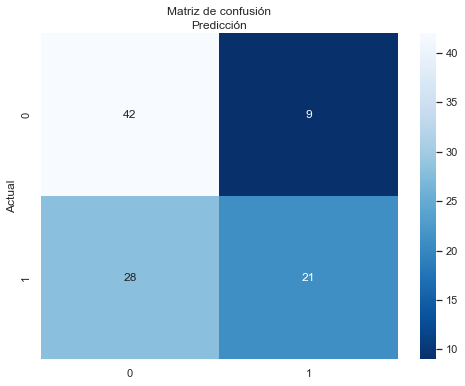

In [42]:
y_pred = final_model.predict(X_test)
y_pred = np.round(y_pred)  # Redondea las predicciones a la clase más cercana (binario)

metricas(y_test,y_pred)

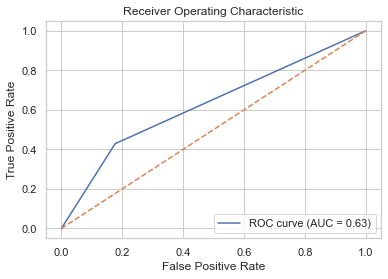

In [43]:
AUC(y_test, y_pred)

## Hiperparámetros con CV

100%|██████████| 1000/1000 [16:28<00:00,  1.01trial/s, best loss: -0.7647058823529412]
[0]	validation_0-logloss:0.59554	validation_0-error:0.14067	validation_0-auc:0.91159	validation_1-logloss:0.70532	validation_1-error:0.53000	validation_1-auc:0.51741
[1]	validation_0-logloss:0.51737	validation_0-error:0.09749	validation_0-auc:0.96267	validation_1-logloss:0.72673	validation_1-error:0.50000	validation_1-auc:0.47919
[2]	validation_0-logloss:0.45846	validation_0-error:0.07103	validation_0-auc:0.97757	validation_1-logloss:0.75511	validation_1-error:0.50000	validation_1-auc:0.47639
[3]	validation_0-logloss:0.40366	validation_0-error:0.05014	validation_0-auc:0.98954	validation_1-logloss:0.76840	validation_1-error:0.51000	validation_1-auc:0.51881
[4]	validation_0-logloss:0.36236	validation_0-error:0.03064	validation_0-auc:0.99389	validation_1-logloss:0.80070	validation_1-error:0.50000	validation_1-auc:0.50320
[5]	validation_0-logloss:0.32535	validation_0-error:0.03064	validation_0-auc:0.9959

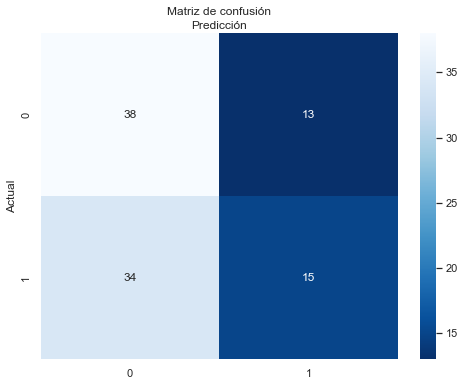

In [44]:

# Definir espacio de búsqueda de hiperparámetros
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'eta': hp.uniform('eta', 0.1, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

# Función objetivo para optimización
def objective(params):
    model = xgb.XGBClassifier(
        booster='gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        eta=params['eta'],
        n_estimators=int(params['n_estimators']),
        random_state=42
    )

    # Realizar validación cruzada con TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring = make_scorer(accuracy_score))

    # Calcular la pérdida como el negativo del promedio de la precisión en validación cruzada
    loss = -cv_scores.mean()

    return {'loss': loss, 'status': 'ok'}

# Realizar la optimización de parámetros
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=1000,
)

# Entrenar el modelo con los mejores parámetros encontrados
final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eta=best_params['eta'],
    eval_metric=['logloss', 'error', 'auc'],
    random_state=42
)
final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

# Evaluar en conjunto de prueba
y_pred = final_model.predict(X_test)
y_pred = np.round(y_pred)  # Redondea las predicciones a la clase más cercana (binario)

# Calcular y mostrar métricas
metricas(y_test, y_pred)


## Optimización de max_depth y n_estimators

In [45]:
# Espacio de búsqueda de hiperparámetros
space2 = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [46]:
# Función objetivo para optimización
def objective2(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        n_estimators=int(params['n_estimators']),
        colsample_bytree = 0.85,
        eta=0.1,
        subsample=0.8,     
        random_state=42
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred3 = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred3)
    return {'loss': -accuracy, 'status': 'ok'}

In [47]:
# Optimización de parámetros
best_params3 = fmin(
    fn=objective2,
    space=space2,
    algo=tpe.suggest,
    max_evals=1000,
    )

100%|██████████| 1000/1000 [07:44<00:00,  2.15trial/s, best loss: -0.56]


In [48]:
best_params3

{'max_depth': 3.0, 'n_estimators': 949.0}

In [49]:
# Entrenar el modelo con los mejores parámetros encontrados
xgb_final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params3['n_estimators']),
    max_depth=int(best_params3['max_depth']),
    subsample=0.8,
    colsample_bytree=0.85,
    eta=0.1,
    eval_metric=['logloss','error','auc'],
    random_state=42
)
xgb_final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.67086	validation_0-error:0.28830	validation_0-auc:0.72264	validation_1-logloss:0.69057	validation_1-error:0.47000	validation_1-auc:0.56663
[1]	validation_0-logloss:0.65120	validation_0-error:0.27577	validation_0-auc:0.79249	validation_1-logloss:0.68913	validation_1-error:0.49000	validation_1-auc:0.53061
[2]	validation_0-logloss:0.63461	validation_0-error:0.25766	validation_0-auc:0.80429	validation_1-logloss:0.68614	validation_1-error:0.48000	validation_1-auc:0.56082
[3]	validation_0-logloss:0.61949	validation_0-error:0.25766	validation_0-auc:0.81629	validation_1-logloss:0.68512	validation_1-error:0.50000	validation_1-auc:0.56763
[4]	validation_0-logloss:0.60588	validation_0-error:0.24234	validation_0-auc:0.83704	validation_1-logloss:0.69142	validation_1-error:0.51000	validation_1-auc:0.55602
[5]	validation_0-logloss:0.59339	validation_0-error:0.25209	validation_0-auc:0.83895	validation_1-logloss:0.69836	validation_1-error:0.52000	validation_1-auc:0.55382
[6]	

[107]	validation_0-logloss:0.24287	validation_0-error:0.04318	validation_0-auc:0.99368	validation_1-logloss:0.89746	validation_1-error:0.50000	validation_1-auc:0.56783
[108]	validation_0-logloss:0.24082	validation_0-error:0.04457	validation_0-auc:0.99385	validation_1-logloss:0.89913	validation_1-error:0.50000	validation_1-auc:0.56743
[109]	validation_0-logloss:0.23878	validation_0-error:0.03900	validation_0-auc:0.99417	validation_1-logloss:0.90184	validation_1-error:0.50000	validation_1-auc:0.56623
[110]	validation_0-logloss:0.23718	validation_0-error:0.04318	validation_0-auc:0.99433	validation_1-logloss:0.90682	validation_1-error:0.50000	validation_1-auc:0.56943
[111]	validation_0-logloss:0.23641	validation_0-error:0.04318	validation_0-auc:0.99447	validation_1-logloss:0.90844	validation_1-error:0.50000	validation_1-auc:0.56863
[112]	validation_0-logloss:0.23449	validation_0-error:0.04178	validation_0-auc:0.99469	validation_1-logloss:0.91482	validation_1-error:0.50000	validation_1-auc:

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=949, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

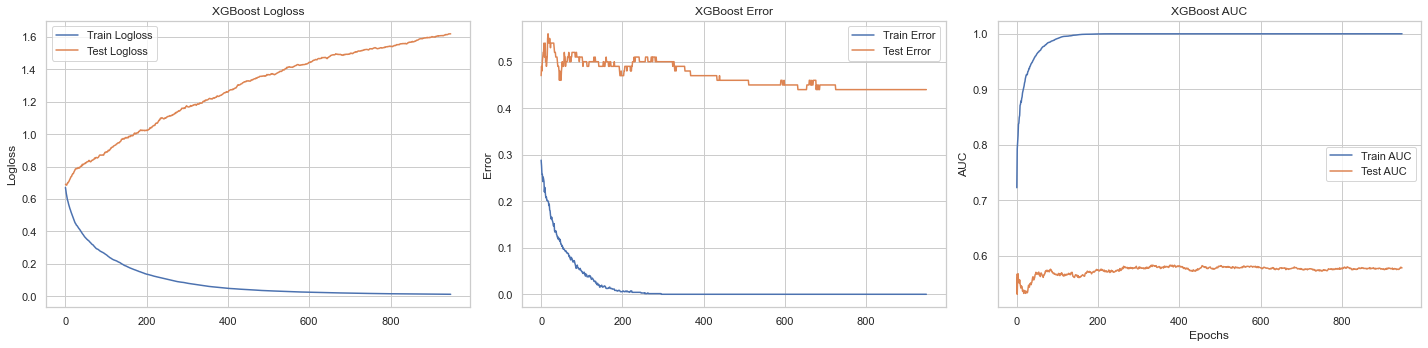

In [50]:
results2 = xgb_final_model.evals_result()
epochs2 = len(results2['validation_0']['logloss'])
x_axis = range(0, epochs2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results2['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results2['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results2['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results2['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results2['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results2['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.5925925925925926
Recall: 0.32653061224489793
F1-score: 0.42105263157894735
              precision    recall  f1-score   support

           0       0.55      0.78      0.65        51
           1       0.59      0.33      0.42        49

    accuracy                           0.56       100
   macro avg       0.57      0.56      0.53       100
weighted avg       0.57      0.56      0.54       100

Confusion Matrix:


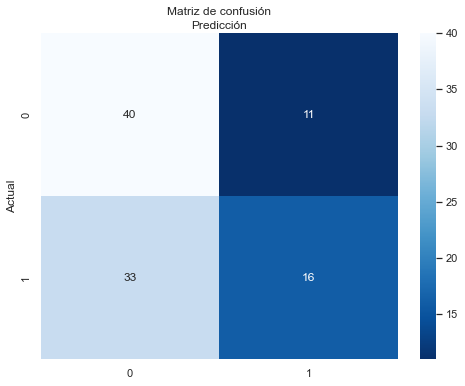

In [51]:
y_pred_n = xgb_final_model.predict(X_test)
y_pred_n = np.round(y_pred_n)  # Redondea las predicciones a la clase más cercana (binario)

# Calcular las métricas
metricas(y_test, y_pred_n)

## Optimización de Hiperparámetros con Cross-Validation

In [52]:
# Definir espacio de búsqueda de hiperparámetros
spaceCV = {
    'max_depth': [int(i) for i in range(1,10)],
    'subsample': [i for i in np.arange(0.1,1,0.1)],
    'colsample_bytree': [i for i in np.arange(0.1,1,1)],
    'eta': [i for i in np.arange(0.01,0.1,0.1)]
}

In [53]:
# Crear un objeto XGBoost Classifier
xgb_model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', scale_pos_weight=ratio)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=spaceCV, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros y validación cruzada
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_paramsCV = grid_search.best_params_

# Entrenar el modelo final con los mejores hiperparámetros encontrados
final_modelCV = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', **best_paramsCV, scale_pos_weight=ratio)
final_modelCV.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [54]:
best_paramsCV

{'colsample_bytree': 0.1, 'eta': 0.01, 'max_depth': 3, 'subsample': 0.6}

Testing accuracy  test= 0.47
Precision: 0.4166666666666667
Recall: 0.20408163265306123
F1-score: 0.273972602739726
              precision    recall  f1-score   support

           0       0.49      0.73      0.58        51
           1       0.42      0.20      0.27        49

    accuracy                           0.47       100
   macro avg       0.45      0.46      0.43       100
weighted avg       0.45      0.47      0.43       100

Confusion Matrix:


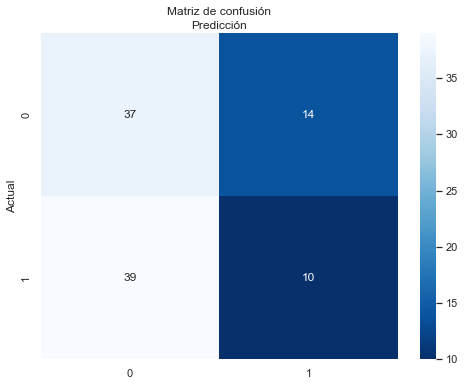

In [55]:
y_predCV = final_modelCV.predict(X_test)
y_predCV = np.round(y_predCV)  # Redondea las predicciones a la clase más cercana (binario)

print("Testing accuracy  test=", accuracy_score(y_test, y_predCV))

metricas(y_test, y_predCV)


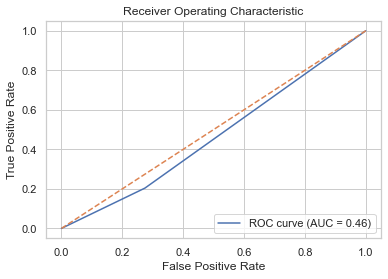

In [56]:
AUC(y_test, y_predCV)

# LSTM

In [57]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [62]:
# Función para crear secuencias
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps-1, -1])
    return np.array(X), np.array(y)

np.random.seed(42)

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Crear secuencias para LSTM
n_steps = 3
X_train_seq, y_train_seq = create_sequences(np.hstack((X_train_scaled, y_train.values.reshape(-1,1))), n_steps)
X_test_seq, y_test_seq = create_sequences(np.hstack((X_test_scaled, y_test.values.reshape(-1,1))), n_steps)

# Asegurarse de que las dimensiones sean correctas
y_train_seq = y_train_seq.reshape((y_train_seq.shape[0], 1))
y_test_seq = y_test_seq.reshape((y_test_seq.shape[0], 1))

all_fold_predictions = []

# Dividir los datos en conjuntos de entrenamiento y prueba usando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train_seq):
    X_train_seq_cv, X_test_seq_cv = X_train_seq[train_index], X_train_seq[test_index]
    y_train_seq_cv, y_test_seq_cv = y_train_seq[train_index], y_train_seq[test_index]

    # Crear modelo LSTM con múltiples capas y Dropout
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, X_train_seq.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo con más épocas
    model.fit(X_train_seq_cv, y_train_seq_cv, epochs=100, verbose=0)

    # Evaluar en conjunto de prueba
    y_pred_proba_cv = model.predict(X_test_seq_cv)
    y_pred_binary_cv = (y_pred_proba_cv > 0.5).astype(int)
    
       # Guardar las predicciones de este fold
    all_fold_predictions.append((y_test_seq_cv, y_pred_proba_cv))

    # Calcular métricas de clasificación para este fold
    accuracy_cv = accuracy_score(y_test_seq_cv, y_pred_binary_cv)
    precision_cv = precision_score(y_test_seq_cv, y_pred_binary_cv)
    recall_cv = recall_score(y_test_seq_cv, y_pred_binary_cv)
    f1_cv = f1_score(y_test_seq_cv, y_pred_binary_cv)


    # Imprimir métricas
    print("Accuracy:", accuracy_cv)
    print("Precision:", precision_cv)
    print("Recall:", recall_cv)
    print("F1 Score:", f1_cv)
    print("--------------")

# Calcular resultados promedio
avg_accuracy = np.mean([accuracy_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_precision = np.mean([precision_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_recall = np.mean([recall_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_f1 = np.mean([f1_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])

# Imprimir resultados promedio
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)

4/4 [==============================] - 0s 5ms/step
Accuracy: 0.5462184873949579
Precision: 0.4857142857142857
Recall: 0.32075471698113206
F1 Score: 0.38636363636363635
--------------
4/4 [==============================] - 1s 3ms/step
Accuracy: 0.6134453781512605
Precision: 0.3673469387755102
Recall: 0.5454545454545454
F1 Score: 0.43902439024390244
--------------
4/4 [==============================] - 1s 5ms/step
Accuracy: 0.680672268907563
Precision: 0.14285714285714285
Recall: 0.030303030303030304
F1 Score: 0.05
--------------
4/4 [==============================] - 0s 2ms/step
Accuracy: 0.44537815126050423
Precision: 0.875
Recall: 0.3111111111111111
F1 Score: 0.459016393442623
--------------
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.5882352941176471
Precision: 1.0
Recall: 0.5882352941176471
F1 Score: 0.7407407407407407
--------------
Average Accuracy: 0.5747899159663865
Average Precision: 0.5741836734693877
Average Recall: 0.3591717395934932
Average F1 Score: 0.41